<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Hotel_dataset_EDA_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import datetime as dt
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving hotel_data_final.csv to hotel_data_final (1).csv


In [3]:
# Dataset is now stored in a Pandas Dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['hotel_data_final.csv']))

In [4]:
# Print Multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
#Explore Data
data.shape
type(data)
data.size
data.shape
data.head()
data.tail()
data.info()

(24180, 12)

pandas.core.frame.DataFrame

290160

(24180, 12)

,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id
0,0,La Quinta,5820 Walden Rd,Beaumont,This hotel is a dump! Upon ch...,margierodriguez.mcqueen,This hotel is a dump! Upon checking in was tol...,1.0,NaN,NaN,"Lodging,Motels,Hotels,Meeting & Event Planning...",15400
1,1,The Point,Po Box 1327,Saranac Lake,How to Feel like you are truly Royalty!,DrThought,After having stayed at The Point for five days...,5.0,NaN,NaN,"Hotels,Hotel,Restaurants",3702
2,1,The Point,Po Box 1327,Saranac Lake,Not to be missed,Dushi110,The Point exceeds perfection. From the moment ...,5.0,NaN,NaN,"Hotels,Hotel,Restaurants",3738
3,1,The Point,Po Box 1327,Saranac Lake,The most amazing place....,GracieLouNY,My review is long overdue but I tell so many p...,5.0,NaN,NaN,"Hotels,Hotel,Restaurants",4593
4,1,The Point,Po Box 1327,Saranac Lake,Lack of maintenance,Guillen,We were picked up from the airport in a car wh...,2.0,NaN,NaN,"Hotels,Hotel,Restaurants",4657


,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id
24175,3128,Polynesian Plaza,2131 Kalakaua Ave,Honolulu,Unprofessional,Sharon T,I booked this hotel for mid October months ago...,1.0,2.0,Rs.17718,"Vacation Rentals,Resorts & Vacation Cottages,V...",10476
24176,3128,Polynesian Plaza,2131 Kalakaua Ave,Honolulu,worst ever !,Shaun F,"We had a one night stay at your hotel, Sept. 1...",1.0,2.0,Rs.17718,"Vacation Rentals,Resorts & Vacation Cottages,V...",10490
24177,3128,Polynesian Plaza,2131 Kalakaua Ave,Honolulu,Location!,Steph K,"Positives: Location! It is on the main strip, ...",3.0,2.0,Rs.17718,"Vacation Rentals,Resorts & Vacation Cottages,V...",10799
24178,3128,Polynesian Plaza,2131 Kalakaua Ave,Honolulu,"Polynesian Plaza, Honolulu",Vernon G,Not exactly a five-star hotel but right in the...,4.0,2.0,Rs.17718,"Vacation Rentals,Resorts & Vacation Cottages,V...",11901
24179,3128,Polynesian Plaza,2131 Kalakaua Ave,Honolulu,IN SEVERE NEED OF UPDATE - OVERHAUL,fordpipefitter,We spent 2 weeks in this hotel due to the cost...,2.0,2.0,Rs.17718,"Vacation Rentals,Resorts & Vacation Cottages,V...",13911


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24180 entries, 0 to 24179
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hotel_id        24180 non-null  int64  
 1   Hotel           24180 non-null  object 
 2   Address         24180 non-null  object 
 3   City            24180 non-null  object 
 4   Title           24119 non-null  object 
 5   Users           24180 non-null  object 
 6   Reviews         24179 non-null  object 
 7   Rating          24151 non-null  float64
 8   Hotel_Type      21867 non-null  float64
 9   Price           21247 non-null  object 
 10  Hotel_Category  24180 non-null  object 
 11  User_id         24180 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.2+ MB


In [6]:
# Checking for missing value
data.isnull().sum()

Hotel_id             0
Hotel                0
Address              0
City                 0
Title               61
Users                0
Reviews              1
Rating              29
Hotel_Type        2313
Price             2933
Hotel_Category       0
User_id              0
dtype: int64

In [7]:
#Filing the missing Review with 'na'
data['Reviews'] = data['Reviews'].fillna('').apply(str)
data['Title'] = data['Title'].fillna('').apply(str)



In [8]:
data = data.dropna()
data = data.reset_index(drop=True)
print('Shape of dataset ',data.shape)
print(data.columns)


Shape of dataset  (21160, 12)
Index(['Hotel_id', 'Hotel', 'Address', 'City', 'Title', 'Users', 'Reviews',
       'Rating', 'Hotel_Type', 'Price', 'Hotel_Category', 'User_id'],
      dtype='object')


In [9]:
# ReChecking for missing value
data.isnull().sum()

Hotel_id          0
Hotel             0
Address           0
City              0
Title             0
Users             0
Reviews           0
Rating            0
Hotel_Type        0
Price             0
Hotel_Category    0
User_id           0
dtype: int64

Hotel Name 

In [10]:
#Hotel Name
hotel_name = data['Hotel'].value_counts()
hotel_name[:20]

Best Western Plus Waterville Grand Hotel              317
Doubletree By Hilton West Palm Beach Airport          276
Hyatt House Seattle/Downtown                          243
Doubletree By Hilton Hotel Bay City - Riverfront      226
Metro Points Hotel-Washington North                   202
Hotel Emma                                            172
The Westin Las Vegas Hotel & Spa                      171
Best Western Springfield                              160
Best Western Seven Seas                               151
French Market Inn                                     144
ARIA Resort Casino                                    139
Kinzie Hotel                                          137
St. James Hotel, an Ascend Hotel Collection Member    136
Grand Hyatt Seattle                                   135
Luana Waikiki Hotel & Suites                          132
Drury Inn & Suites New Orleans                        132
Galleria Park Hotel                                   125
Homewood Suite

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb163502b0>]],
      dtype=object)

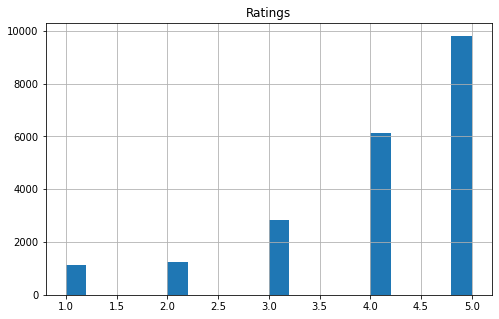

In [11]:
plt.rcParams['figure.figsize'] = (8, 5.0)
scores = pd.DataFrame({"Ratings":data["Rating"]})
scores.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb162527f0>]],
      dtype=object)

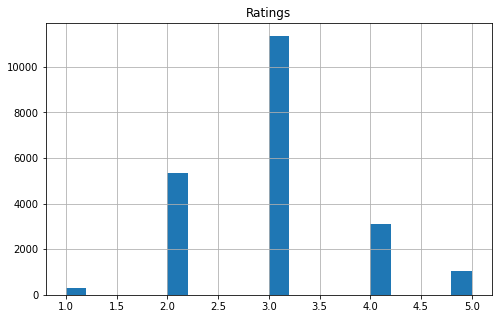

In [12]:
plt.rcParams['figure.figsize'] = (8, 5.0)
scores = pd.DataFrame({"Ratings":data["Hotel_Type"]})
scores.hist(bins=20)

Frequent Name - User Name

Text(0, 0.5, 'User_Name_Count')

Text(0.5, 0, 'User_Name')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

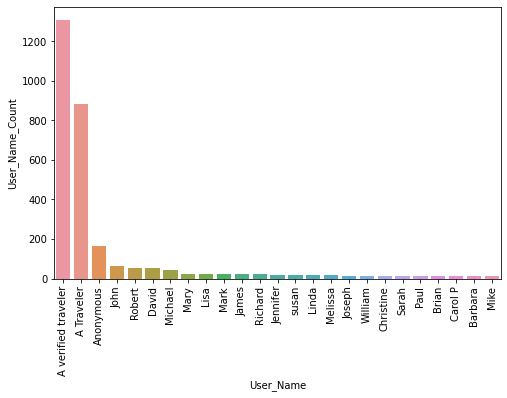

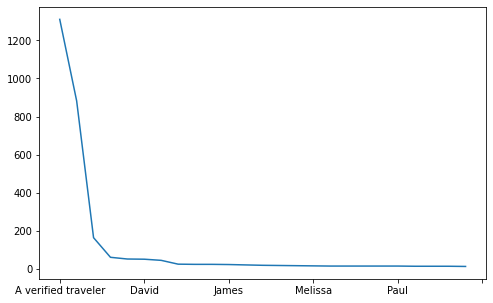

In [13]:
User_Ferq=data['Users'].value_counts()[:25]
sns.barplot(User_Ferq.index,User_Ferq.values)
plt.ylabel('User_Name_Count')
plt.xlabel('User_Name')
plt.xticks(rotation='vertical')
plt.show()

User_Ferq.plot()

Reviews by City

Text(0, 0.5, 'Reviews By City')

Text(0.5, 0, 'City Name')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

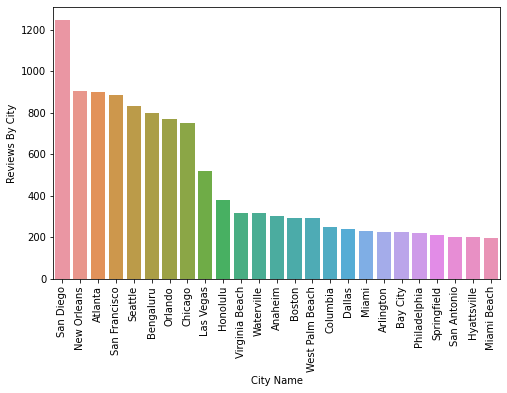

In [14]:
City_Counts = data['City'].value_counts()[:25]
sns.barplot(City_Counts.index,City_Counts.values)
plt.ylabel('Reviews By City')
plt.xlabel('City Name')
plt.xticks(rotation='vertical')
plt.show()

In [16]:
#Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings (3).csv


In [17]:
# Dataset is now stored in a Pandas Dataframe
import io
rating_data = pd.read_csv(io.BytesIO(uploaded['ratings.csv']))

In [18]:
#Explore Data
rating_data.shape
type(rating_data)
rating_data.size
rating_data.shape
rating_data.head()
rating_data.tail()
rating_data.info()

(24180, 3)

pandas.core.frame.DataFrame

72540

(24180, 3)

,User_id,Hotel_id,Rating
0,15400,0,1.0
1,3702,1,5.0
2,3738,1,5.0
3,4593,1,5.0
4,4657,1,2.0


,User_id,Hotel_id,Rating
24175,10476,3128,1.0
24176,10490,3128,1.0
24177,10799,3128,3.0
24178,11901,3128,4.0
24179,13911,3128,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24180 entries, 0 to 24179
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_id   24180 non-null  int64  
 1   Hotel_id  24180 non-null  int64  
 2   Rating    24151 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 566.8 KB


In [19]:
# Checking for missing value
rating_data.isnull().sum()

User_id      0
Hotel_id     0
Rating      29
dtype: int64

In [20]:
rating_data['Rating'] = rating_data['Rating'].fillna('')

In [21]:
rating_data.dropna()

,User_id,Hotel_id,Rating
0,15400,0,1
1,3702,1,5
2,3738,1,5
3,4593,1,5
4,4657,1,2
...,...,...,...
24175,10476,3128,1
24176,10490,3128,1
24177,10799,3128,3
24178,11901,3128,4


In [23]:
print('Shape of dataset ',rating_data.shape)
print(rating_data.columns)

Shape of dataset  (24180, 3)
Index(['User_id', 'Hotel_id', 'Rating'], dtype='object')


In [24]:
#Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving hotel_details.csv to hotel_details (1).csv


In [25]:
# Dataset is now stored in a Pandas Dataframe
import io
hotel_data = pd.read_csv(io.BytesIO(uploaded['hotel_details.csv']))

In [26]:
#Explore Data
hotel_data.shape
type(hotel_data)
hotel_data.size
hotel_data.shape
hotel_data.head()
hotel_data.tail()
hotel_data.info()

(3131, 7)

pandas.core.frame.DataFrame

21917

(3131, 7)

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category
0,0,La Quinta,5820 Walden Rd,Beaumont,NaN,NaN,"Lodging,Motels,Hotels,Meeting & Event Planning..."
1,1,The Point,Po Box 1327,Saranac Lake,NaN,NaN,"Hotels,Hotel,Restaurants"
2,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels"
3,3,Economy Inn,1223 Radford Blvd,Dillon,2.0,Rs.4694,Hotels
4,4,Holiday Inn Express & Suites Lenoir City (knox...,1112 Highway 321 N,Lenoir City,2.0,Rs.6146,"Banquet Rooms,Reception Centers,Lodging,Hotels..."


,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category
3126,3126,Sheraton Mission Valley San Diego Hotel,1433 Camino Del Rio South,San Diego,3.0,Rs.9373,Hotels
3127,3127,Holiday Inn Canyon De Chelly,Bia Route 7 Garcia Trading Post,Chinle,3.0,Rs.7196,Hotels
3128,3128,Polynesian Plaza,2131 Kalakaua Ave,Honolulu,2.0,Rs.17718,"Vacation Rentals,Resorts & Vacation Cottages,V..."
3129,3129,Quality Inn,2120 Jameson Pl S W,Decatur,2.0,Rs.7373,"Lodges,Hotels,Hotels & Motels,Lodging,Motels"
3130,3130,Quality Inn,12439 Northwest Fwy,Houston,2.0,Rs.7373,"Hotel & Motel Reservations,Hotels,Hotels & Mot..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3131 entries, 0 to 3130
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hotel_id        3131 non-null   int64  
 1   Hotel           3131 non-null   object 
 2   Address         3131 non-null   object 
 3   City            3131 non-null   object 
 4   Hotel_Type      1679 non-null   float64
 5   Price           1605 non-null   object 
 6   Hotel_Category  3131 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 171.4+ KB
